In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load) 

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID")
# Display the data table for preview
mouse_clinical_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumorvol_groupby = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumorvol_df = pd.DataFrame(mean_tumorvol_groupby)
mean_tumorvol_df.reset_index(inplace = True) 

# Preview DataFrame
mean_tumorvol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumorvol_groupby = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumorvol_df = pd.DataFrame(sem_tumorvol_groupby)
sem_tumorvol_df.reset_index(inplace = True) 

# Preview DataFrame
sem_tumorvol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean_tumorvol_df = pd.pivot_table(mean_tumorvol_df, values = 'Tumor Volume (mm3)', index = ['Timepoint'], columns = 'Drug')

# Preview that Reformatting worked
reformat_mean_tumorvol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


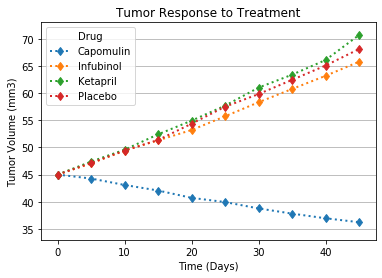

In [5]:
# Generate the Plot (with Error Bars)

# Set the x axis limits to not start from 0
xLim = [-2.5, 47.5]
# Set the y axis limits 
yLim = [33, 73]

# Plot
ax = reformat_mean_tumorvol_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].plot.line(use_index = True, linestyle='dotted', \
                                linewidth=2, xlim = xLim, ylim = yLim, legend = True, marker = 'd', title = 'Tumor Response to Treatment')

# Set y axis grid lines 
ax.yaxis.grid(True)

# Set x & y axis labels 
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Note/Tip: Use grid(color='black', linestyle='-', linewidth=0.25) to customize grid lines
# Note/Tip: Use ax.xaxis for x-axis grid lines
# Note/Tip: Use ax.grid() to get both x & y axis

# Save the Figure
plt.savefig('./output/treatment.png')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metsite_groupby = mouse_clinical_df.groupby(['Drug', 'Timepoint'])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metsite_df = pd.DataFrame(mean_metsite_groupby)

# Preview DataFrame
mean_metsite_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metsite_groupby = mouse_clinical_df.groupby(['Drug', 'Timepoint'])["Metastatic Sites"].sem()

# Convert to DataFrame
sem_metsite_df = pd.DataFrame(sem_metsite_groupby)

# Preview DataFrame
sem_metsite_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [8]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean_metsites_df = pd.pivot_table(mean_metsite_df, values = 'Metastatic Sites', index = ['Timepoint'], columns = 'Drug')

# Preview that Reformatting worked
reformat_mean_metsites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


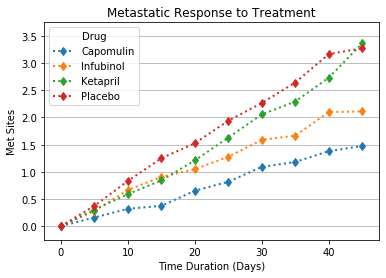

In [9]:
# Generate the Plot (with Error Bars)

# Set the x axis limits to not start from 0
xLim = [-2.5, 47.5]
# Set the y axis limits 
yLim = [-0.25, 3.75]

# Plot
ax = reformat_mean_metsites_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].plot.line(use_index = True, linestyle='dotted', \
                                linewidth=2, xlim = xLim, ylim = yLim, legend = True, marker = 'd', title = 'Metastatic Response to Treatment')

# Set y axis grid lines 
ax.yaxis.grid(True)

# Set x & y axis labels 
ax.set_xlabel("Time Duration (Days)")
ax.set_ylabel("Met Sites")

# Note/Tip: Use grid(color='black', linestyle='-', linewidth=0.25) to customize grid lines
# Note/Tip: Use ax.xaxis for x-axis grid lines
# Note/Tip: Use ax.grid() to get both x & y axis

# Save the Figure
plt.savefig('./output/spread.png.png')
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_timepoint_groupby = mouse_clinical_df.groupby(['Drug', 'Timepoint'])["Mouse ID"].count()

# Convert to DataFrame
drug_timepoint_df = pd.DataFrame(drug_timepoint_groupby)
drug_timepoint_df.rename(columns = {'Mouse ID':'Mouse Count'}, inplace = True)

# Preview DataFrame
drug_timepoint_df

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
...                          ...
Zoniferol 25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformat_drug_timepoint_df = pd.pivot_table(drug_timepoint_df, values = 'Mouse Count', index = ['Timepoint'], columns = 'Drug')

# Preview that Reformatting worked
reformat_drug_timepoint_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


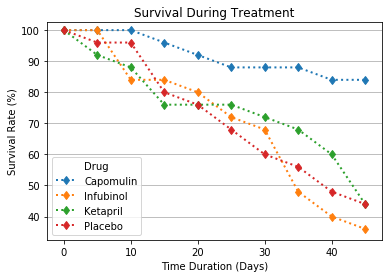

In [12]:
# Generate the Plot (Accounting for percentages)

# Copy the datframe and convert the values in the columns to the percentage of the 1st row for the graph
reformat_drug_timepoint_df2 = []
reformat_drug_timepoint_df2 = reformat_drug_timepoint_df.copy()

for col in reformat_drug_timepoint_df.columns:
    reformat_drug_timepoint_df2[col] = (reformat_drug_timepoint_df[col]/reformat_drug_timepoint_df[col].iloc[0])*100
    reformat_drug_timepoint_df2[col].round(decimals = 2)

# Set the x axis limits to not start from 0
xLim = [-2.5, 47.5]
# Set the y axis limits 
yLim = [32.50, 102.50]

# Plot
ax = reformat_drug_timepoint_df2[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].plot.line(use_index = True, linestyle='dotted', \
                                linewidth=2, xlim = xLim, ylim = yLim, legend = True, marker = 'd', title = 'Survival During Treatment')

# Set y axis grid lines 
ax.yaxis.grid(True)

# Set x & y axis labels 
ax.set_xlabel("Time Duration (Days)")
ax.set_ylabel("Survival Rate (%)")

# Note/Tip: Use grid(color='black', linestyle='-', linewidth=0.25) to customize grid lines
# Note/Tip: Use ax.xaxis for x-axis grid lines
# Note/Tip: Use ax.grid() to get both x & y axis

# Save the Figure
plt.savefig('./output/survival.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
drug_list = []
percent_change_list = []
for col in reformat_mean_tumorvol_df.columns:
    drug_list.append(col)
    percent_change_list.append(round(((reformat_mean_tumorvol_df[col].iloc[-1] - reformat_mean_tumorvol_df[col].iloc[0])/reformat_mean_tumorvol_df[col].iloc[0])*100, 5)) 

percent_change_df = pd.DataFrame()
percent_change_df['Drug'] = drug_list
percent_change_df['Pct'] = percent_change_list

# Display the data to confirm
percent_change_df

,Drug,Pct
0,Capomulin,-19.47530
1,Ceftamin,42.51649
2,Infubinol,46.12347
3,Ketapril,57.02879
4,Naftisol,53.92335
5,Placebo,51.29796
6,Propriva,47.24117
7,Ramicane,-22.32090
8,Stelasyn,52.08513
9,Zoniferol,46.57975


In [14]:
# Store all Relevant Percent Changes into a Tuple
drug_tp = ()
percent_change_tp = ()
drug_percent_change_tp= ()
drug_tp = tuple(drug_list)
percent_change_tp = tuple(percent_change_list)
drug_percent_change_tp = tuple(zip(drug_tp, percent_change_tp))


# Splice the data between passing and failing drugs
# Note: These are not used in the graph below 
pos_percent_change_list = []
pos_drug_list = []
neg_percent_change_list = []
neg_drug_list = []
pos_percent_change_tp = ()
pos_drug_tp = ()
neg_percent_change_tp =()
neg_drug_tp =()
for i,d in enumerate(drug_percent_change_tp):
    if drug_percent_change_tp[i][1] >= 0:
        pos_percent_change_list.append(drug_percent_change_tp[i][1])
        pos_drug_list.append(drug_percent_change_tp[i][0])
    else:
        neg_percent_change_list.append(drug_percent_change_tp[i][1])
        neg_drug_list.append(drug_percent_change_tp[i][0])
pos_percent_change_tp = tuple(pos_percent_change_list)
pos_drug_tp = tuple(pos_drug_list)
neg_percent_change_tp = tuple(neg_percent_change_list)
neg_drug_tp = tuple(neg_drug_list)

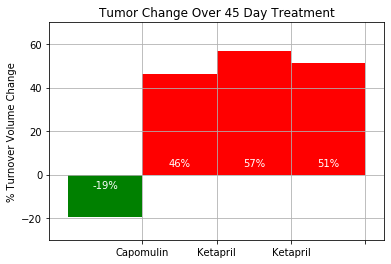

In [16]:
# Additonal: To match the graph: Limit the Drug & Results to 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo' 
graph_drug_tp = tuple(drug_tp[i] for i in [0, 2, 3, 5])
graph_percent_change_tp = tuple(percent_change_tp[i] for i in [0, 2, 3, 5])
graph_drug_percent_change_tp = tuple(zip(graph_drug_tp, graph_percent_change_tp))
# Use lists and conver to tuple 
graph_pos_percent_change_list = []
graph_pos_drug_list = []
graph_neg_percent_change_list = []
graph_neg_drug_list = []
graph_pos_percent_change_tp = ()
graph_pos_drug_tp = ()
graph_neg_percent_change_tp =()
graph_neg_drug_tp =()
for i,d in enumerate(graph_drug_percent_change_tp):
    if graph_drug_percent_change_tp[i][1] >= 0:
        graph_pos_percent_change_list.append(graph_drug_percent_change_tp[i][1])
        graph_pos_drug_list.append(graph_drug_percent_change_tp[i][0])
    else:
        graph_neg_percent_change_list.append(graph_drug_percent_change_tp[i][1])
        graph_neg_drug_list.append(graph_drug_percent_change_tp[i][0])
graph_pos_percent_change_tp = tuple(graph_pos_percent_change_list)
graph_pos_drug_tp = tuple(graph_pos_drug_list)
graph_neg_percent_change_tp = tuple(graph_neg_percent_change_list)
graph_neg_drug_tp = tuple(graph_neg_drug_list)


# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
# plot tumor volume reduction 
plt.bar(graph_neg_drug_tp, graph_neg_percent_change_tp, color = 'green', width=1)
plt.bar(graph_pos_drug_tp, graph_pos_percent_change_tp, color = 'red', width=1)
# Set axis, limits & grid  etc.
# ax.set_xlabel("Drug")
ax.set_ylabel("% Turnover Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

yLim = [-30, 70]
xLim = [-.75, 3.75]
ax.set_xlim(xLim)
ax.set_ylim(yLim)

yTicks = [-20,0,20,40,60]
ax.set_yticks(yTicks)
xTicks = [0.5,1.5,2.5,3.5]
ax.set_xticks(xTicks)

ax.grid(which='both')
ax.grid(which='major', alpha=1)
# ax.axhline(y, linestyle='--', color='k') # horizontal lines
# ax.axvline(x, linestyle='--', color='k') # vertical lines


# Use functions to label the percentages of changes
def add_labels(labels, ax):
    xLables = graph_percent_change_tp
    for rect, label in zip(ax.patches, labels):
        height = rect.get_height()
        if label>0:
            h = 3
            l = str(int(label)) + '%'
        else: 
            h = -7
            l = '-' + str(-1*int(label)) + '%'
            
        ax.text(rect.get_x() + rect.get_width() / 2, h, l, ha='center', va='bottom', color = 'white')
    # Return 
    return ax

# Call functions to implement the function calls
ax = add_labels(graph_percent_change_tp, ax)

# Save the Figure
fig.savefig('./output/change.png')
# Show the Figure
fig.show()